In [1]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
train = pd.read_csv('newtrain.csv') # uses pandas library to open a .csv file
test = pd.read_csv('newtest.csv')
sample = pd.read_csv('sample_submission.csv')

In [2]:
train

,data_channel,tag_label,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares,abs_title_sentiment_polarity
0,5,1162,69,12,968,0.403527,1.0,0.635271,8,1,...,0.050000,0.50,-0.269444,-0.800000,-0.050000,0.350000,-0.200000,0.150000,1100,0.200000
1,4,1954,247,9,242,0.556017,1.0,0.710345,4,3,...,0.100000,0.50,-0.166667,-0.166667,-0.166667,0.000000,0.000000,0.500000,1300,0.000000
2,2,717,238,14,835,0.480723,1.0,0.650295,5,2,...,0.062500,1.00,-0.194074,-0.500000,-0.050000,0.200000,0.200000,0.300000,974,0.200000
3,0,5854,632,11,177,0.632768,1.0,0.773585,5,1,...,0.250000,0.70,-0.350000,-0.400000,-0.300000,0.477273,0.193182,0.022727,1200,0.193182
4,1,6595,618,12,263,0.678295,1.0,0.744565,7,2,...,0.050000,0.80,-0.150000,-0.150000,-0.150000,0.000000,0.000000,0.500000,2400,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,8204,370,8,593,0.627523,1.0,0.678733,83,41,...,0.100000,0.80,-0.448538,-1.000000,-0.155556,0.000000,0.000000,0.500000,3800,0.000000
7996,5,6184,262,9,407,0.542929,1.0,0.753363,5,1,...,0.136364,0.80,-0.405556,-0.800000,-0.100000,0.000000,0.000000,0.500000,1100,0.000000
7997,0,1519,482,13,250,0.491935,1.0,0.564972,18,1,...,0.100000,1.00,-0.300000,-0.500000,-0.100000,0.000000,0.000000,0.500000,1400,0.000000
7998,5,1344,242,9,658,0.540707,1.0,0.754617,9,4,...,0.100000,1.00,-0.261111,-0.800000,-0.050000,0.000000,0.000000,0.500000,1300,0.000000


In [3]:
#shuffling
# Split data 
# frac returns float value * length of data frame values
# without it the df data wont be seen
train = train.sample(frac=1)
size = int(0.7 * len(train))
train_set = train[:size]#5600,56
test_set = train[size:]#2400, 56

In [4]:
train_set

,data_channel,tag_label,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares,abs_title_sentiment_polarity
2087,5,7594,408,11,1577,0.453042,1.0,0.586011,13,3,...,0.05,1.0,-0.255694,-1.000000,-0.125000,0.000000,0.000000,0.500000,801,0.000000
7885,1,440,245,14,331,0.558642,1.0,0.765957,2,1,...,0.10,0.8,-0.272222,-0.500000,-0.150000,0.000000,0.000000,0.500000,9400,0.000000
2085,4,2088,179,14,387,0.532468,1.0,0.713004,10,1,...,0.10,0.6,-0.275926,-0.500000,-0.125000,0.666667,-0.500000,0.166667,6600,0.500000
7210,5,6419,86,17,594,0.409894,1.0,0.475703,41,1,...,0.25,0.6,-0.619643,-0.800000,-0.250000,0.535714,0.285714,0.035714,1000,0.285714
1034,4,342,470,13,1009,0.377377,1.0,0.527928,3,3,...,0.10,0.8,-0.217028,-0.500000,-0.050000,0.000000,0.000000,0.500000,812,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6082,5,5709,633,11,225,0.687783,1.0,0.891667,2,1,...,0.10,0.5,-0.762500,-1.000000,-0.050000,1.000000,0.300000,0.500000,3400,0.300000
665,0,6784,366,8,589,0.632042,1.0,0.787402,22,7,...,0.10,1.0,-0.396296,-0.700000,-0.125000,1.000000,0.500000,0.500000,2100,0.500000
1120,2,8585,659,10,211,0.651961,1.0,0.748252,8,2,...,0.25,0.8,-0.277778,-0.400000,-0.155556,0.000000,0.000000,0.500000,2100,0.000000
1521,3,7091,567,7,94,0.755319,1.0,0.812500,8,6,...,0.10,1.0,-0.183333,-0.200000,-0.166667,0.000000,0.000000,0.500000,2300,0.000000


In [5]:
def scaling(x):
    x=(x-np.mean(x))/np.std(x) #scaling using z score
    return x

In [6]:
x = train_set.drop('abs_title_sentiment_polarity', axis = 1)
y = train_set['abs_title_sentiment_polarity']
x=scaling(x) #scaling using z score
x=np.array(x)
y=np.array(y)
w=np.ones((1,x.shape[1]))
print("x shape",x.shape,"y shape",y.shape,"w shape",w.shape)

x shape (5600, 55) y shape (5600,) w shape (1, 55)


###  Error: difference between the sample result predicted by the model obtained after learning and the actual sample result.
* Training error: error that you get when you run the model on the training data.
* Generalization error: error that you get when you run the model on new samples. Obviously, we 
    prefer a model with a smaller generalization error.
* Underfitting: occurs when the model or the algorithm does not fit the data well enough.
* Overfitting: occurs when the training error of the model obtained after learning is small but
    the generalization error is large (poor generalization capability)

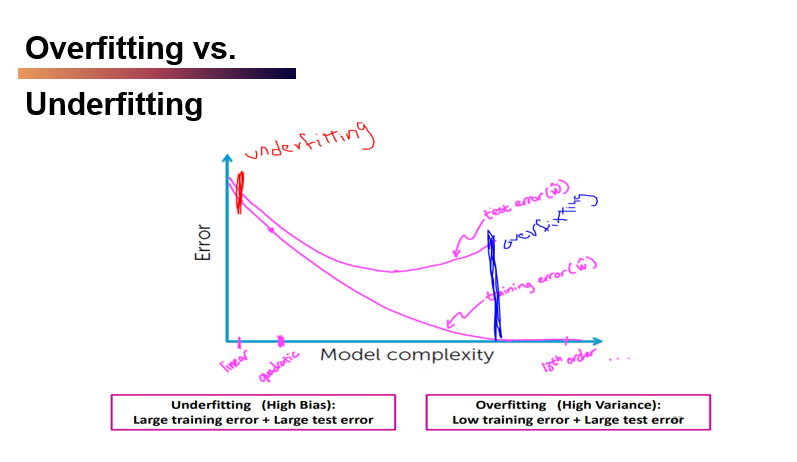

In [7]:
def hypo(w,x,b):#prediction
    pred=np.dot(w,x.T)+b
    return pred

In [8]:
def error(pred,y,m,lamda,w):#cost #error
    #er=(1/(2*m))*np.sum(np.square(pred-y.T))+(lamda/(2*m))*np.sum(np.square(w))
    er=(1/(2*m))*(np.sum(np.square(pred-y.T))+lamda*np.sum(np.square(w)))
    return er

In [9]:
def gradient(pred,y,m,alpha,w,b,lamda,x):#gradient decent
    #dw=(1/m)*np.dot((pred-y.T),x)+(lamda/m)*np.sum(w)
    db=(1/m)*np.sum(pred-y.T)
    #w=w-alpha*(dw)
    w=w*(1-(alpha*lamda)/m)-(alpha/m)*np.dot((pred-y.T),x)#accoding to the equation of regularization
    b=b-alpha*db
    return b,w

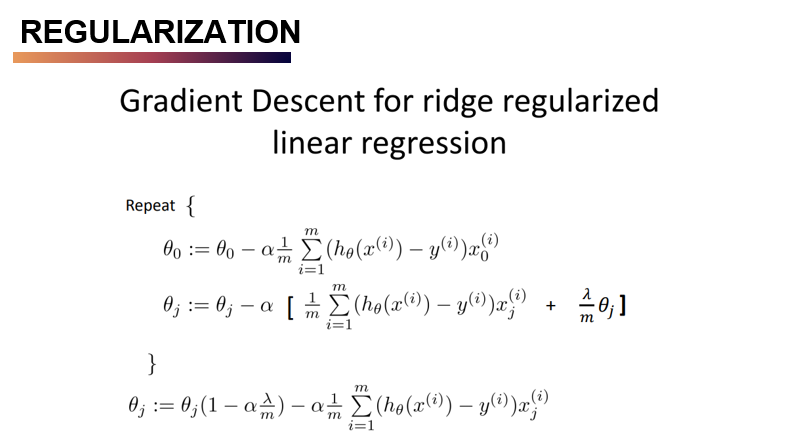

In [10]:
"""alpha=0.05#0.03
lamda=0.1#0.1"""
#main
m=len(x)
b=1#1
cost=[]
alpha=0.03#0.03
lamda=0.1#0.1
for i in range(2000000):
    pred=hypo(w,x,b) #predicton
    er=error(pred,y,m,lamda,w)
    b,w=gradient(pred,y,m,alpha,w,b,lamda,x)
    if i%100000==0:
        print(er)
        cost.append(er)

54.15729639399978
0.010154924577958326
0.01014520016445583
0.010136467220869458
0.010128621568005694
0.010121573054690908
0.01011524068939113
0.010109551709531279
0.01010444074541066
0.010099849069066958
0.010095723919457664
0.010092017896204867
0.010088688414937251
0.010085697217970792
0.010083009934705619
0.010080595686687769
0.010078426732797694
0.010076478150488628
0.01007472754941198
0.010073154814139106


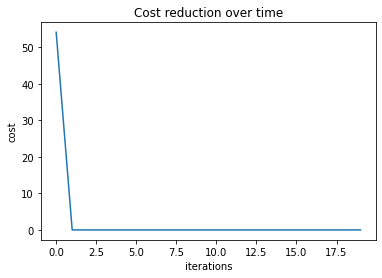

In [11]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost reduction over time')
plt.show()

In [19]:
w

array([[ 7.12428457e-03, -1.76848645e-04, -5.23630675e-03,
        -3.09507879e-03, -2.53515853e-03, -3.65865150e-04,
         7.83414577e-03, -1.68286744e-03, -3.36499248e-04,
        -2.36274692e-03,  9.21056263e-04, -3.80247631e-03,
        -2.33980852e-03, -1.24063916e-03,  5.54716679e-03,
         4.68372566e-03, -3.96510838e-03,  1.69049265e-03,
         2.95329785e-04, -6.08789431e-03,  2.60066113e-03,
        -2.37002028e-03,  7.97054777e-03, -3.08047998e-03,
         1.98628737e-04,  3.55561777e-03,  3.92325796e-01,
         3.93236252e-01,  3.95907423e-01,  3.92444931e-01,
         3.50593137e-01,  1.77103117e-01,  1.84411790e-01,
         1.05005482e-01,  3.32084285e-01,  2.74806598e-01,
         3.49535685e-01,  3.74314002e-01,  3.64175059e-01,
        -4.52424380e-03, -2.40234984e-03, -1.26899455e-02,
         1.76456716e-02, -1.18486180e-02, -2.44803152e-02,
         2.36548190e-02, -8.12597446e-03, -1.42907959e-03,
        -2.57864629e-02,  8.72078168e-03,  1.04318084e-0

In [13]:
b

0.1558410021578561

In [14]:
test_set

,data_channel,tag_label,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,shares,abs_title_sentiment_polarity
5223,2,5599,364,9,1332,0.420647,1.0,0.523504,74,16,...,0.062500,1.0,-0.228117,-0.50,-0.066667,0.000000,0.000000,0.500000,10000,0.000000
2133,1,3199,674,9,1485,0.465553,1.0,0.644178,45,11,...,0.033333,1.0,-0.250631,-0.50,-0.050000,0.000000,0.000000,0.500000,621,0.000000
5921,0,2943,643,11,653,0.438650,1.0,0.578049,22,1,...,0.033333,1.0,-0.168750,-0.20,-0.125000,0.750000,0.800000,0.250000,1800,0.800000
5542,0,3894,57,13,0,0.000000,0.0,0.000000,0,0,...,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.500000,2100,0.000000
258,0,2095,655,12,267,0.543396,1.0,0.587302,15,3,...,0.136364,1.0,-0.162500,-0.25,-0.050000,0.100000,0.300000,0.400000,2000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,3,2557,512,8,2371,0.231523,1.0,0.304838,85,1,...,0.033333,1.0,-0.044053,-0.40,-0.025000,0.512500,0.337500,0.012500,3600,0.337500
216,4,4552,130,10,983,0.403689,1.0,0.611742,6,5,...,0.100000,1.0,-0.314167,-0.70,-0.125000,0.050000,0.000000,0.450000,1800,0.000000
7974,3,7900,628,9,382,0.588391,1.0,0.753304,11,2,...,0.033333,0.5,-0.351852,-0.50,-0.100000,0.288889,-0.155556,0.211111,1400,0.155556
5463,5,5975,280,10,111,0.763636,1.0,0.909091,3,1,...,0.100000,0.2,-0.300000,-0.40,-0.200000,0.400000,-0.250000,0.100000,742,0.250000


In [15]:
#validation
xt = test_set.drop('abs_title_sentiment_polarity', axis = 1)
yt = test_set['abs_title_sentiment_polarity']
xt=scaling(xt)
xt=np.array(xt)
yt=np.array(yt)
print("xt",xt.shape)
print("yt",yt.shape)
pred_t=hypo(w,xt,b)
print("pred_t",pred_t.shape)
n=len(xt)
er=error(pred_t,yt,n,lamda,w)
print(er)

xt (2400, 55)
yt (2400,)
pred_t (1, 2400)
0.01082386031143277


In [16]:
#compute accuracy
testpred=hypo(w,xt,b)
trainpred=hypo(w,x,b)
print('trainpred',trainpred.shape,'y',y.shape)
print('testpred',testpred.shape,'yt',yt.shape)

trainpred (1, 5600) y (5600,)
testpred (1, 2400) yt (2400,)


In [17]:
from sklearn.metrics import r2_score# accuracy.score for classification 
print('train accuracy:',r2_score(y,trainpred.T))
print('test accuracy :',r2_score(yt,testpred.T))

train accuracy: 0.6062465707726314
test accuracy : 0.5795277198068827


*****

In [66]:
#final prediction #target
test=scaling(test)
t=np.array(test)
prediction=hypo(w,t,b)

In [67]:
prediction

array([[0.14881213, 0.02570289, 0.10338334, ..., 0.21980568, 0.22070861,
        0.00960424]])

In [68]:
prediction=prediction.reshape(prediction.shape[1],)
print(prediction.shape)

In [70]:
ids=np.array(sample['Id']) #prepre to submission
print(ids)

[   1    2    3 ... 1998 1999 2000]


In [71]:
ids.shape

(2000,)

In [73]:
e=pd.DataFrame({'Id':ids,'abs_title_sentiment_polarity':prediction})
e.to_csv('newspaper.CSV',encoding='utf-8',index=False)